# Comparing the Efficacy of the Exemplar and Prototype Models for Predicting Color Categorization Across Languages

COG260 Research Project 2023

Gabriel Guralnick and Elizabeth Li

## Demos for analyzing World Color Survey (WCS)

COG 260: Data, Computation, and The Mind (Yang Xu)

Data source: http://www1.icsi.berkeley.edu/wcs/data.html

______________________________________________

Import helper function file for WCS data analysis.

In [2]:
from wcs_helper_functions import *

Import relevant Python libraries.

In [3]:
import numpy as np
from scipy import stats
from random import random
from collections import defaultdict, Counter
%matplotlib inline

### Demo 1: Import stimulus (color chip) information in [Munsell space](https://en.wikipedia.org/wiki/Munsell_color_system)

> Stimuli were 330 color chips in Munsell space, each defined along lightness and hue dimensions.

> Each color chip has an index _(from 1 to 330)_ and a coordinate (lightness *(alphabet)*, hue *(integer)*).

In the following section, you will learn how to convert from **(a) index to coordinate** and **(b) coordinate to index**.

______________________________________________

Load chip information in Munsell space. 

`munsellInfo` is a 2-element tuple with dictionary elements.

In [4]:
munsellInfo = readChipData('./WCS_data_core/chip.txt')
munsellInfo

({'E29': 1,
  'C23': 2,
  'F4': 3,
  'I36': 4,
  'C20': 5,
  'C6': 6,
  'E15': 7,
  'H40': 8,
  'G6': 9,
  'I30': 10,
  'I22': 11,
  'C11': 12,
  'I18': 13,
  'I26': 14,
  'C35': 15,
  'C0': 16,
  'E3': 17,
  'I11': 18,
  'E27': 19,
  'F16': 20,
  'E39': 21,
  'B10': 22,
  'F34': 23,
  'H10': 24,
  'G24': 25,
  'H30': 26,
  'B5': 27,
  'E38': 28,
  'D18': 29,
  'F6': 30,
  'C24': 31,
  'E36': 32,
  'D15': 33,
  'F28': 34,
  'D3': 35,
  'I20': 36,
  'E30': 37,
  'G39': 38,
  'G16': 39,
  'E25': 40,
  'H3': 41,
  'E10': 42,
  'I29': 43,
  'B40': 44,
  'E17': 45,
  'F0': 46,
  'I17': 47,
  'E8': 48,
  'D25': 49,
  'I35': 50,
  'H8': 51,
  'B16': 52,
  'H39': 53,
  'G15': 54,
  'E24': 55,
  'C4': 56,
  'H24': 57,
  'F10': 58,
  'C34': 59,
  'I25': 60,
  'H2': 61,
  'E32': 62,
  'D1': 63,
  'G29': 64,
  'F39': 65,
  'B8': 66,
  'C18': 67,
  'E37': 68,
  'G12': 69,
  'C32': 70,
  'I1': 71,
  'G19': 72,
  'H34': 73,
  'C26': 74,
  'I16': 75,
  'F5': 76,
  'F24': 77,
  'C36': 78,
  'H0': 79,
 

#### (a) Index &rarr; Coordinate

Access the second dictionary in `munsellInfo`.

In [5]:
indexCoord = munsellInfo[1]

`indexCoord` is a dictionary with **index _(key)_ &rarr; coordinate _(value)_** pairs. For example, to retrieve the Munsell coordinate _(lightness, hue)_ for chip with numerical index 1:

In [6]:
print(indexCoord[1])

('E', '29')


You can also uncomment the following to display full stimulus information (long).

In [7]:
# print(indexCoord)

#### (b) Coordinate &rarr; Index

Access the first dictionary in `munsellInfo`.

In [8]:
coordIndex = munsellInfo[0]

`coordIndex` is a dictionary with **coordinate _(key)_ &rarr; index _(value)_** pairs. For example, to access numerical index for the color chip at Munsell coordinate _(D, 11)_:

In [9]:
print(coordIndex['D11'])

258


You can also uncomment the following to display full stimulus information (long).

In [10]:
# print(coordIndex)

### Demo 2: Import stimulus information in [CIELAB space](https://en.wikipedia.org/wiki/Lab_color_space)

> Each of the 330 stimuli can also be mapped to the 3D CIELAB space, where the dimensions are `l` _(lightness)_, `a`, & `b` _(color opponency)_.

> CIELAB Coordinates have a **one-to-one** correspondence with Munsell index, which ranges from 1 to 330.

______________________________________________

Load chip coordinates in CIELAB. 

`cielabCoord` is a dictionary with **index _(key)_ &rarr; CIELAB Coordinate _(value)_** pairs.

In [11]:
cielabCoord = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')

For example, to obtain the CIELAB coordinates for chip with numerical index 1:

In [12]:
print(cielabCoord[1])

('61.70', '-4.52', '-39.18')


### Demo 3: Import color naming data
    
> Each of the 330 color chips was named by speakers of 110 different languages.

______________________________________________

Load naming data. 

`namingData` is a hierarchical dictionary organized as follows:

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; chip index _(1 - 330)_ &rarr; color term**

In [13]:
namingData = readNamingData('./WCS_data_core/term.txt')

For example, to obtain naming data from language 1 and speaker 1 for all 330 color chips:

In [55]:
namingData[1][1]; # remove semicolon to see data in full

{1: 'LB',
 2: 'LB',
 3: 'LE',
 4: 'WK',
 5: 'LF',
 6: 'LE',
 7: 'F',
 8: 'LE',
 9: 'LE',
 10: 'LB',
 11: 'LB',
 12: 'F',
 13: 'LB',
 14: 'LB',
 15: 'LF',
 16: 'LF',
 17: 'LE',
 18: 'LB',
 19: 'LF',
 20: 'LB',
 21: 'LE',
 22: 'LF',
 23: 'LF',
 24: 'LB',
 25: 'LB',
 26: 'LB',
 27: 'LB',
 28: 'LF',
 29: 'LE',
 30: 'LB',
 31: 'LE',
 32: 'LF',
 33: 'LE',
 34: 'LB',
 35: 'LB',
 36: 'LE',
 37: 'LB',
 38: 'LB',
 39: 'LE',
 40: 'LB',
 41: 'LB',
 42: 'LE',
 43: 'F',
 44: 'LB',
 45: 'LF',
 46: 'LB',
 47: 'LF',
 48: 'LB',
 49: 'LE',
 50: 'LB',
 51: 'F',
 52: 'LF',
 53: 'LE',
 54: 'LB',
 55: 'LB',
 56: 'LE',
 57: 'LB',
 58: 'F',
 59: 'LF',
 60: 'LB',
 61: 'LE',
 62: 'F',
 63: 'LE',
 64: 'LB',
 65: 'LE',
 66: 'LF',
 67: 'F',
 68: 'LE',
 69: 'F',
 70: 'LF',
 71: 'F',
 72: 'F',
 73: 'F',
 74: 'LF',
 75: 'LB',
 76: 'LE',
 77: 'LB',
 78: 'LF',
 79: 'F',
 80: 'LB',
 81: 'F',
 82: 'LB',
 83: 'LF',
 84: 'LE',
 85: 'LB',
 86: 'LE',
 87: 'LB',
 88: 'LE',
 89: 'LB',
 90: 'LB',
 91: 'F',
 92: 'LF',
 93: 'LB',


For example, to see how many speakers language 1 has:

In [15]:
len(namingData[1])

25

### Demo 4: Import color foci data
    
> Apart from naming the color chips, each speaker also pointed to foci color chips for each color term they had used.

> **Note**: A single color term may have multiple foci locations.

______________________________________________

Load foci data. 

`fociData` is a hierarchical dictionary organized as follows: 

**language _(1 - 110)_ &rarr; speaker _(1 - *range varies per language*)_ &rarr; color term &rarr; foci coordinates**

In [16]:
fociData = readFociData('./WCS_data_core/foci-exp.txt');

For example, to obtain foci data for language 1 and speaker 1, where each entry shows foci locations for given term: 

In [17]:
fociData[1][1]

{'LF': ['A:0'],
 'WK': ['D:9', 'D:10', 'D:11', 'D:12'],
 'F': ['D:25'],
 'LB': ['J:0'],
 'G': ['F:17'],
 'LE': ['F:1', 'F:2', 'F:3', 'G:1', 'G:2', 'G:3']}

In the above example, foci for term 'LF' is located at coordinate _(A, 0)_ in the Munsell chart.

### Demo 5: Import speaker demographic information

> Most speakers' age _(integer)_ and gender _(M/F)_ information was recorded.

______________________________________________

Load speaker information.

`speakerInfo` is a hierarchical dictionary organized as follows:

**language &rarr; speaker &rarr; (age, gender)**

In [18]:
speakerInfo = readSpeakerData('./WCS_data_core/spkr-lsas.txt')

For example, uncomment the following line to access _(age, gender)_ information for all speakers from language 1:

In [19]:
# speakerInfo[1]

For example, uncomment the following line to access _(age, gender)_ information for speaker 1 from language 1:

In [20]:
# speakerInfo[1][1]

### Demo 6: Visualize color naming from an individual speaker

> Naming patterns from a speaker can be visualized in the stimulus palette _(Munsell space)_.

______________________________________________

Extract an example speaker datum from an example language.

In [21]:
lg61_spk5 = namingData[61][5]

Extract color terms used by that speaker.

In [22]:
terms = lg61_spk5.values()
# terms

Encode the color terms into random numbers (for plotting purposes).

In [23]:
encoded_terms = map_array_to(terms, generate_random_values(terms))

Visualize the color naming pattern for that speaker&mdash;each color patch corresponds to extension of a color term. Color scheme is randomized, but the partition of the color space is invariant.

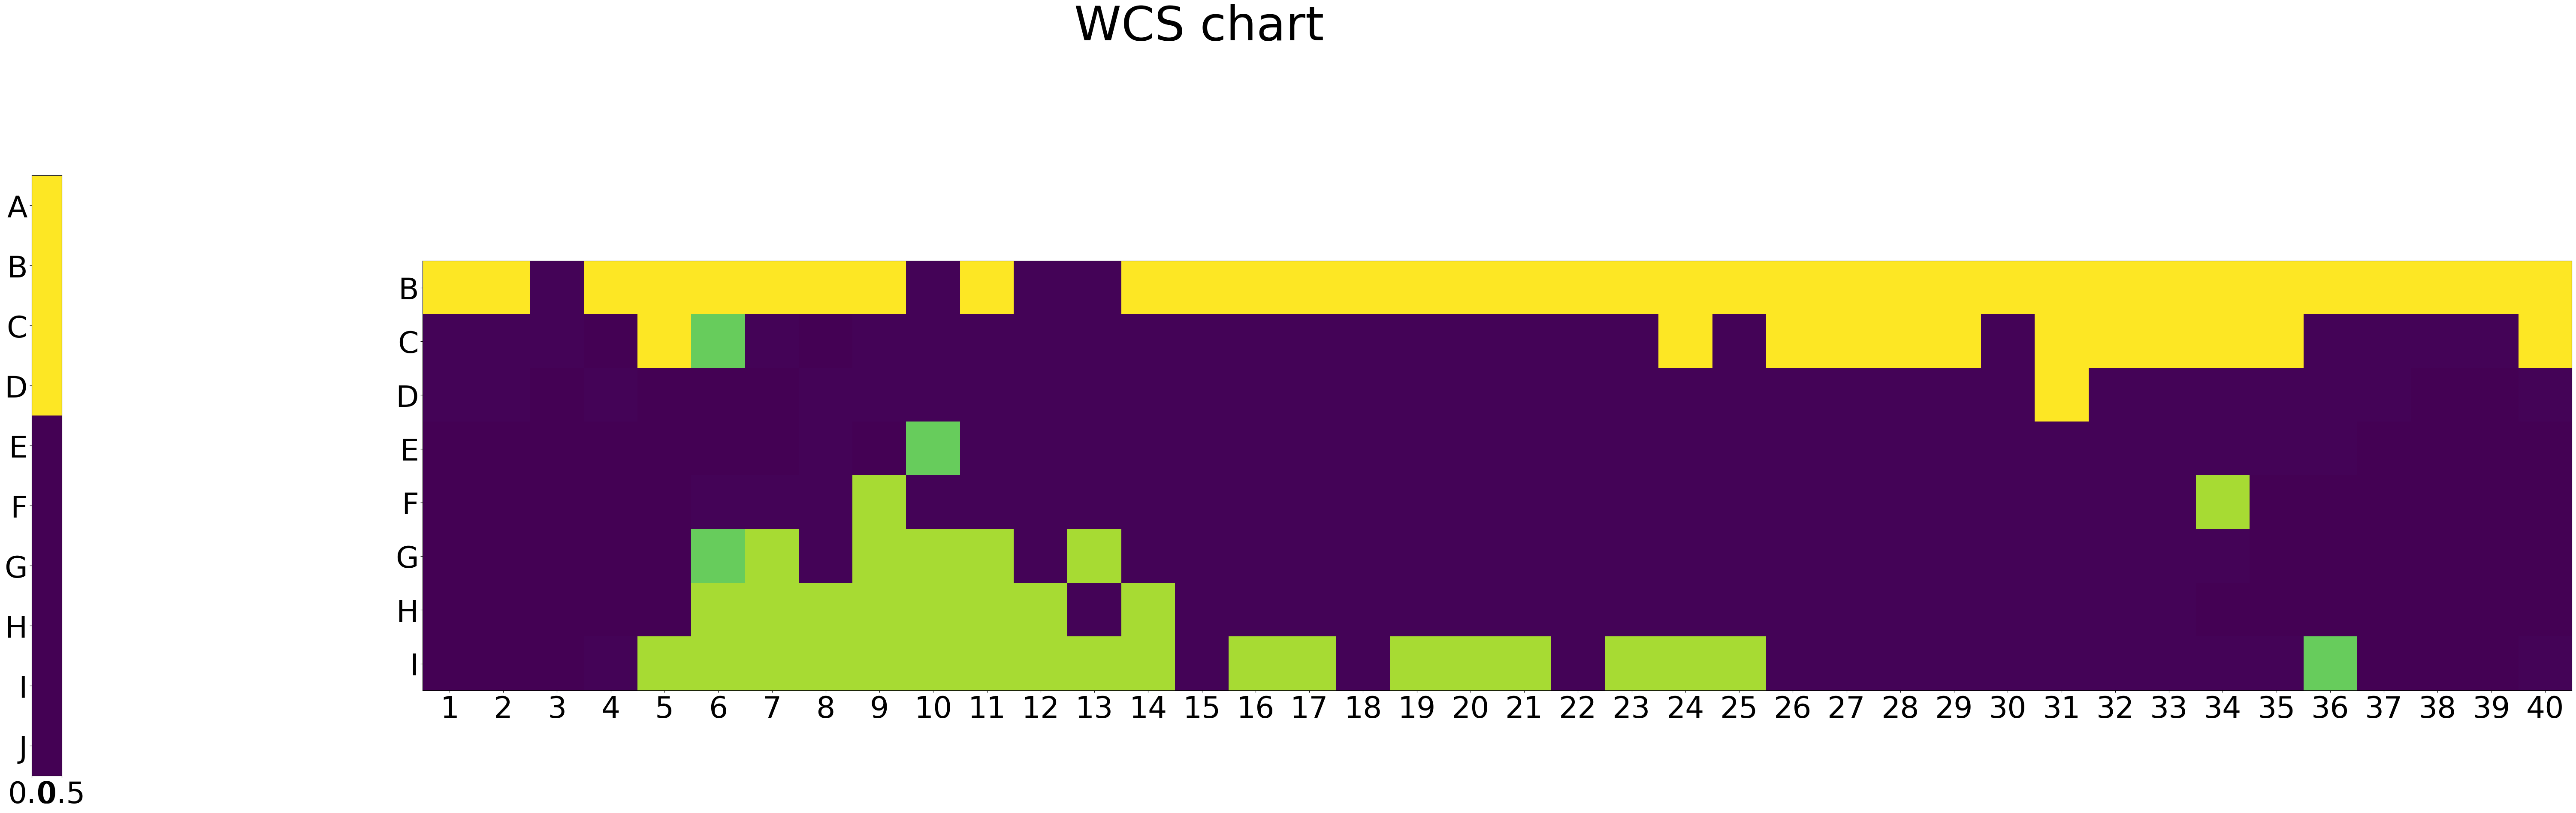

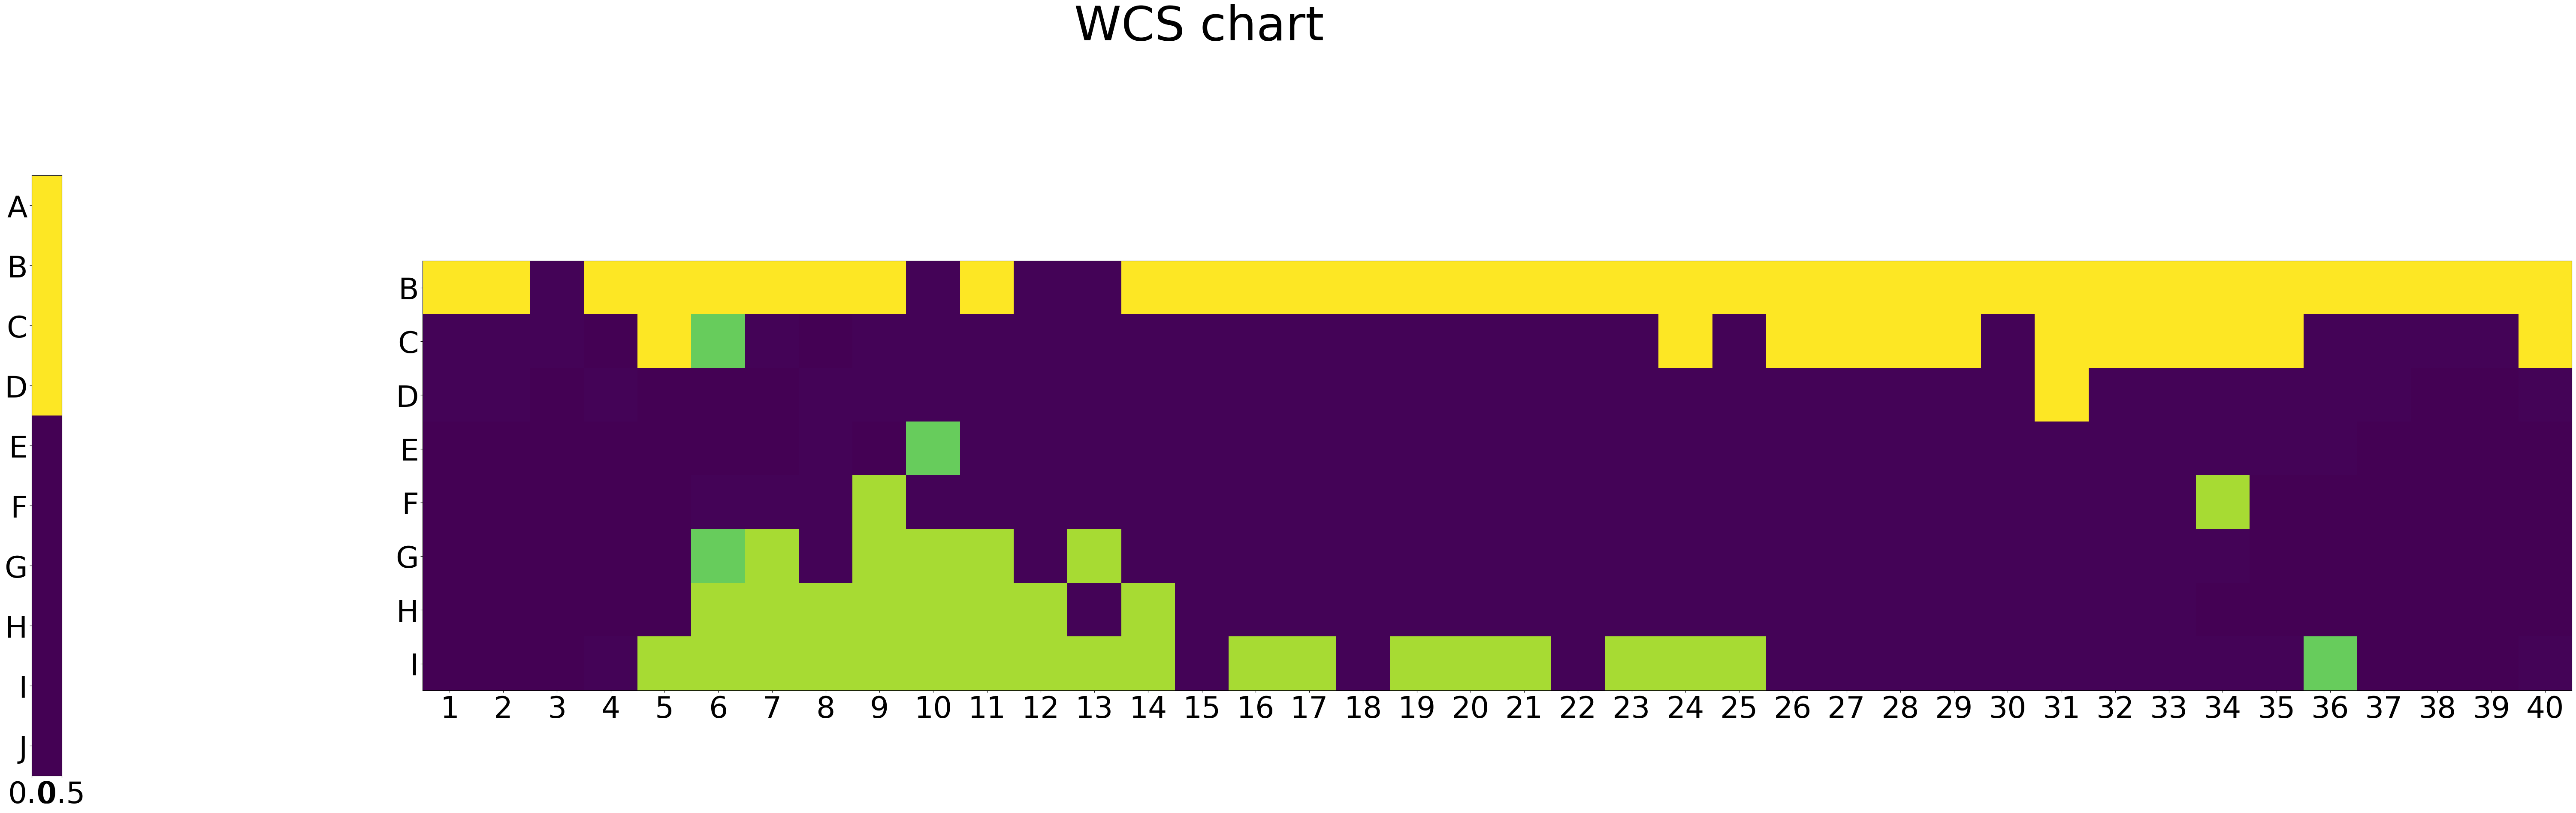

In [24]:
plotValues(encoded_terms)

**Note**: `plotValues()` is a generic function for visualizing various kinds of information on the chart, suited to needs.

Now you are in a position to start exploring this data set - enjoy!

## Our Analysis

### Empirical Color Foci

Our first goal is to reproduce the following diagram from Abbott, Griffiths, & Regier (2016) showing the empirical color foci from the WCS dataset.

![image.png](images/empirical-contours.png)

This graph shows the color chips that were most commonly identified as the focus of some color term across all languages. The clustering of the contours suggests a set of universal basic colors at each of the peaks in the contour plot.

Part of our evaluation of the prototype and exemplar models will be a qualitative comparison of their predicted color foci plots to this empirical one.

In [25]:
# fociData

In [26]:
overallFociCount = {}
for language in fociData:
    speakerData = fociData[language]
    for speaker in speakerData:
        colors = speakerData[speaker]
        for color in colors:
            colorFoci = colors[color]
            for focus in colorFoci:
                focusIndex = coordIndex[focus.replace(':', '')]
                if focusIndex in overallFociCount:
                    overallFociCount[focusIndex] += 1
                else:
                    overallFociCount[focusIndex] = 1


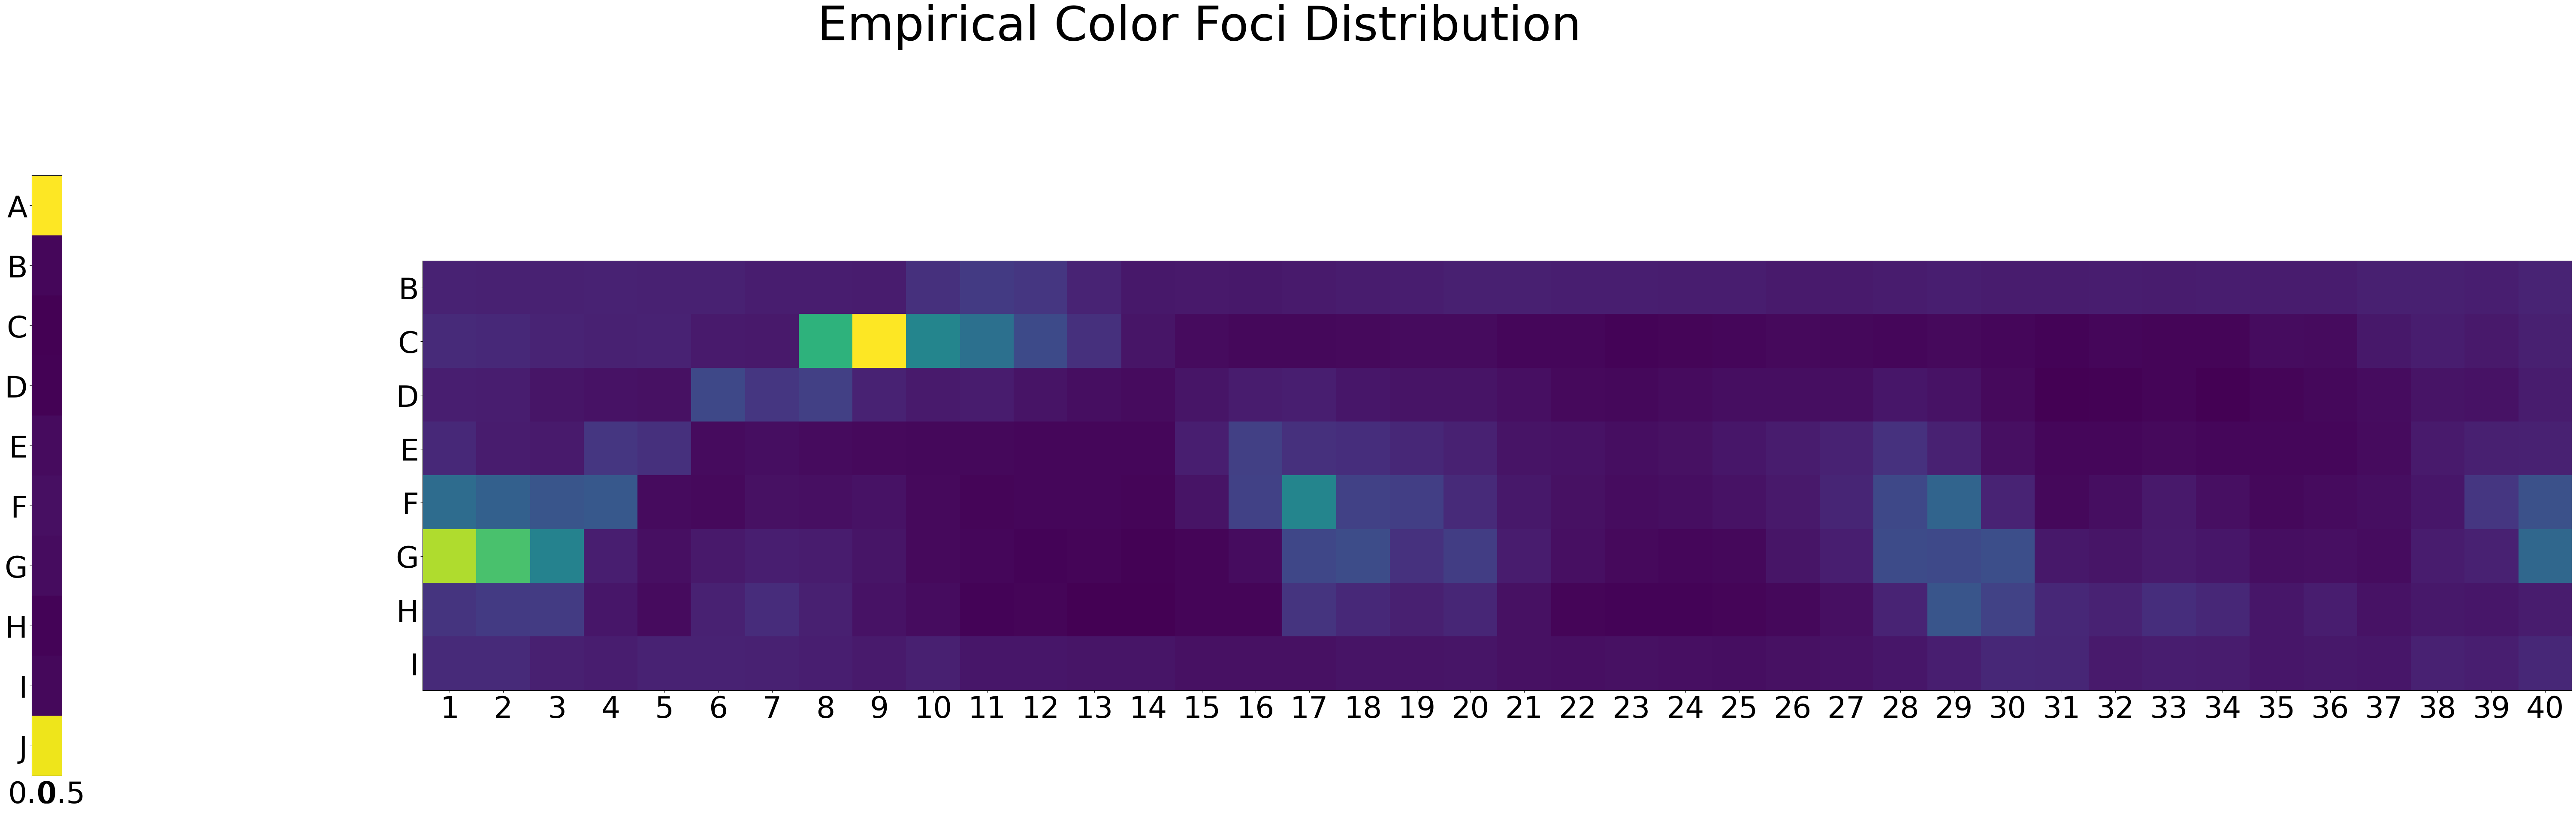

In [27]:
fig = plotValues(map_array_to(indexCoord, overallFociCount), title='Empirical Color Foci Distribution')

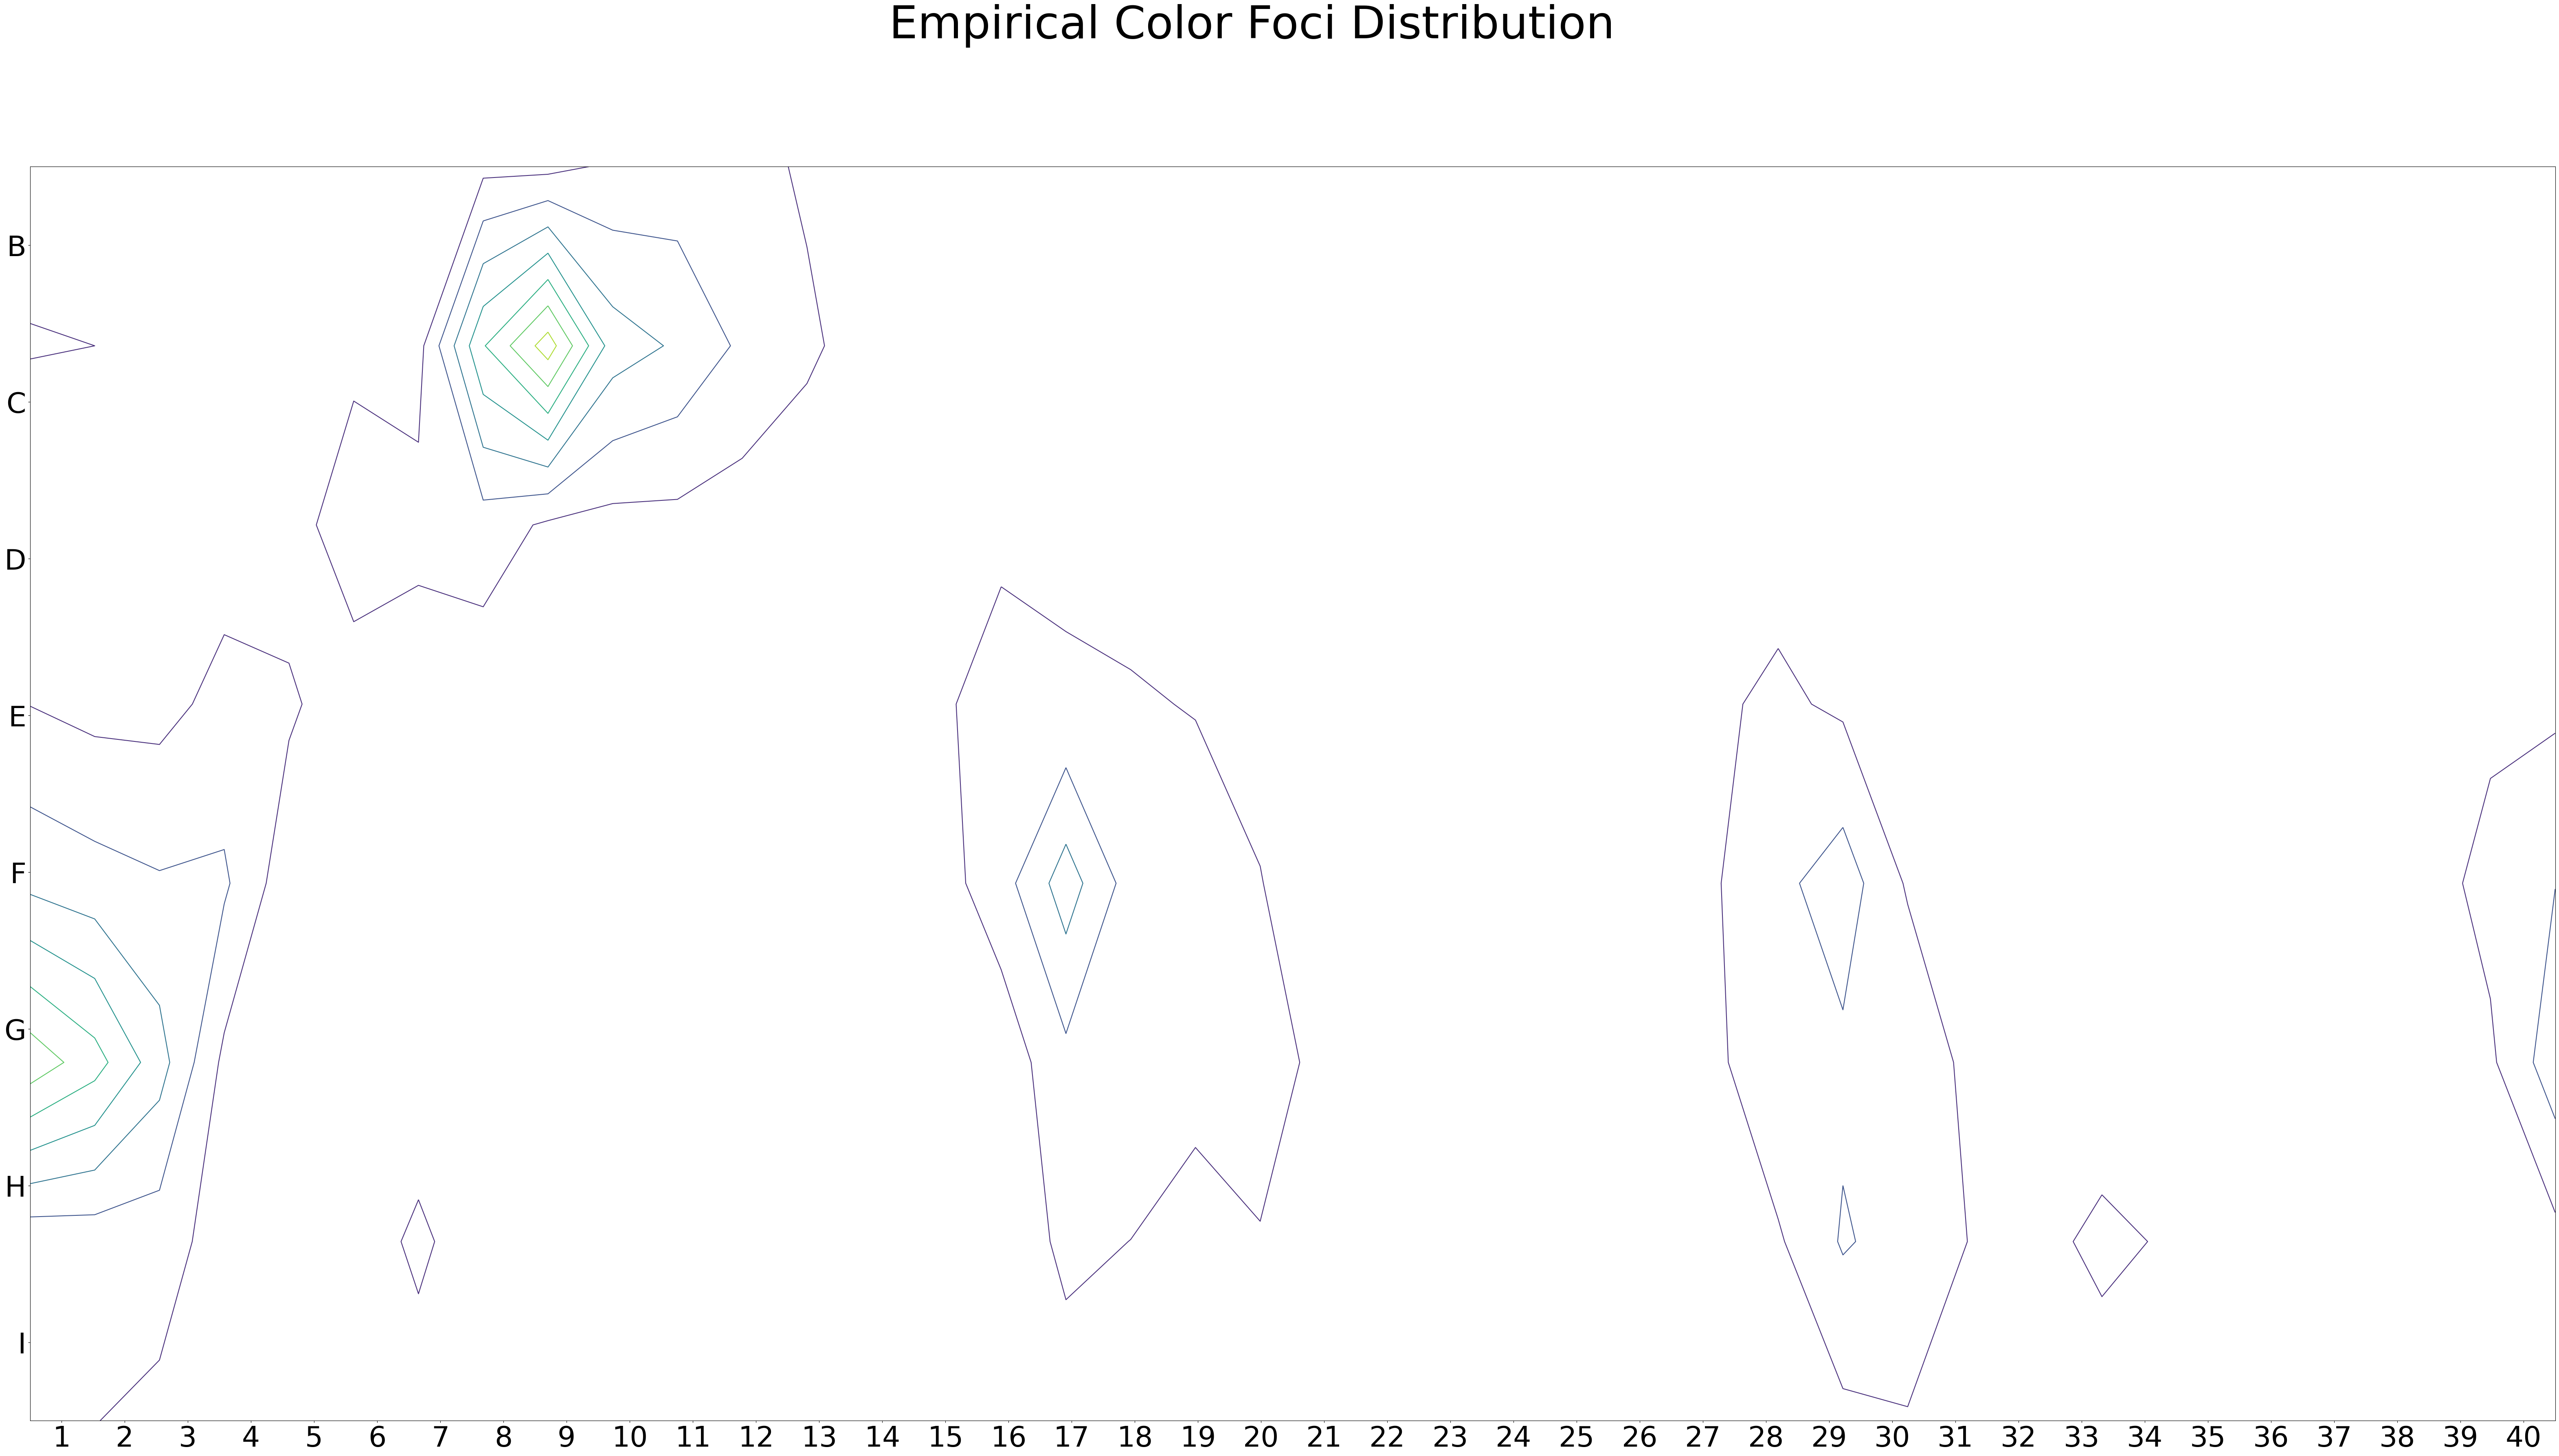

In [28]:
fig = plotValuesContour(map_array_to(indexCoord, overallFociCount), title='Empirical Color Foci Distribution')

### Prototype Model

In [43]:
def calculate_prototypes(fociData, cielabCoord):
    # For each color category, calculate the centroid (average CIELAB coordinates)
    # Return a dictionary mapping each color category to its prototype

    color_term_accumulator = {}  # To accumulate CIELAB coordinates for each color term
    color_term_counts = {}  # To count occurrences of each color term

    for language in fociData:
        for speaker in fociData[language]:
            for color_term in fociData[language][speaker]:
                fociLst = fociData[language][speaker][color_term]
                for foci in fociLst:
                    chip_index = coordIndex[foci.replace(":", "")]
                    cielab_coord_str = cielabCoord[chip_index]
                    
                    # Convert the CIELAB coordinates from strings to floats
                    cielab_coord = tuple(float(value) for value in cielab_coord_str)

                    # Accumulate the CIELAB coordinates for each color term
                    if color_term not in color_term_accumulator:
                        color_term_accumulator[color_term] = np.zeros(len(cielab_coord))
                        color_term_counts[color_term] = 0
                    color_term_accumulator[color_term] += np.array(cielab_coord)
                    color_term_counts[color_term] += 1

    # Compute the centroid of CIELAB coordinates for each color term
    color_prototypes = {}
    for color_term in color_term_accumulator:
        color_prototypes[color_term] = color_term_accumulator[color_term] / color_term_counts[color_term]

    return color_prototypes


In [44]:
prototypes = calculate_prototypes(fociData, cielabCoord)
# prototypes

In [45]:
print(prototypes)

{'LF': array([ 9.58032e+01, -5.96000e-02,  6.00000e-02]), 'WK': array([71.73840909, 19.745     , 37.63840909]), 'F': array([79.05226721,  7.2640081 ,  5.72510121]), 'LB': array([17.6496,  0.2272, -3.1312]), 'G': array([ 45.2684375 , -10.69748162,   3.68775735]), 'LE': array([49.21692308, 40.28369231, 25.07646154]), 'S': array([49.47065248,  6.0831773 , 16.40747518]), 'GB': array([76.475, -0.565, 45.665]), 'FU': array([72.84481013, 12.54075949, 14.61620253]), 'AA': array([56.36071006, -8.39289941, 15.11662722]), 'EP': array([73.08064516,  3.0766129 , 20.04596774]), 'IT': array([ 46.15292683,   1.80756098, -16.39926829]), 'NR': array([56.31083333, 45.31833333, 31.70395833]), 'TK': array([28.01638889,  1.47416667, -1.80291667]), 'YN': array([ 56.67862069, -45.18034483,  12.03241379]), 'AT': array([57.25793103, 36.10827586, 19.72517241]), 'IR': array([ 54.0475, -14.83  , -11.8425]), 'PN': array([58.43956522, 18.13826087, -7.13565217]), 'WT': array([29.85352941, 20.24941176,  4.15882353]), 

In [81]:
# basically replicating fociData to get prototype model's predicted foci

def compute_similarity(prototype, cielab_coords, c=0.001):
    # Vectorized computation of Euclidean distance between prototype and all CIELAB coordinates
    distances = np.linalg.norm(cielab_coords - prototype, axis=1)

    # Calculate the similarity scores
    similarities = np.exp(-c * distances**2)

    return similarities

# cielab_array = np.array([tuple(map(float, coords)) for coords in cielabCoord.values()])
cielab_array = np.array([list(map(float, v)) for v in cielabCoord.values()])
print(cielab_array.shape)
# print(cielab_array)
# print(cielabCoord.values())

# foci(index) : count
predicted = {}
for language in fociData:
    languageData = fociData[language]
    for speaker in languageData:
        speakerData = languageData[speaker]

        for colour in speakerData:
            fociInfo = speakerData[colour]
            n = len(fociInfo)

            # Get the prototype for this color
            prototype = np.array(prototypes[colour])
            # print(prototype.shape)

            # Compute similarities to all color chips (vectorized operation)
            similarities = compute_similarity(prototype, cielab_array)
            # print(similarities.shape)
            # print("######################")
            # break

            # Get indices of the top n most similar chips
            # more similar = larger score
            top_n_indices = np.argsort(-similarities)[:n]

            # Update the predicted count for each of the top n chips
            for idx in top_n_indices:
                chip_index = list(cielabCoord.keys())[idx]
                if chip_index not in predicted:
                    predicted[chip_index] = 0
                predicted[chip_index] += 1


(330, 3)


In [75]:
print(predicted)

{141: 271, 6: 761, 318: 366, 159: 102, 237: 384, 16: 598, 89: 244, 154: 1916, 176: 128, 256: 144, 17: 115, 298: 206, 61: 118, 321: 121, 46: 3306, 155: 264, 263: 2483, 24: 97, 300: 1008, 324: 104, 302: 94, 22: 102, 278: 76, 27: 110, 230: 96, 129: 164, 84: 136, 201: 102, 56: 126, 217: 123, 79: 485, 295: 916, 292: 54, 44: 113, 290: 173, 252: 70, 314: 77, 274: 153, 310: 36, 123: 109, 99: 33, 134: 189, 224: 55, 29: 30, 151: 611, 63: 470, 275: 53, 299: 58, 312: 339, 326: 161, 257: 163, 197: 14, 215: 8, 227: 75, 87: 75, 94: 218, 198: 61, 255: 71, 18: 76, 113: 112, 14: 34, 60: 34, 170: 32, 90: 32, 11: 33, 127: 36, 47: 35, 75: 30, 117: 49, 248: 28, 228: 17, 166: 14, 204: 33, 43: 18, 277: 33, 4: 36, 50: 33, 226: 18, 57: 17, 111: 419, 114: 23, 309: 83, 216: 88, 209: 41, 36: 12, 130: 73, 180: 34, 98: 101, 85: 110, 119: 15, 223: 15, 287: 75, 210: 85, 149: 84, 260: 40, 67: 129, 246: 62, 148: 305, 264: 90, 116: 46, 183: 147, 232: 325, 171: 34, 41: 41, 146: 219, 258: 31, 289: 83, 220: 60, 205: 69, 247

In [76]:
print(len(overallFociCount))
print(len(predicted))

330
327


In [83]:
print(overallFociCount.keys() - predicted.keys())
missing = overallFociCount.keys() - predicted.keys()
for m in missing:
    predicted[m] = 0

{282, 125, 143}


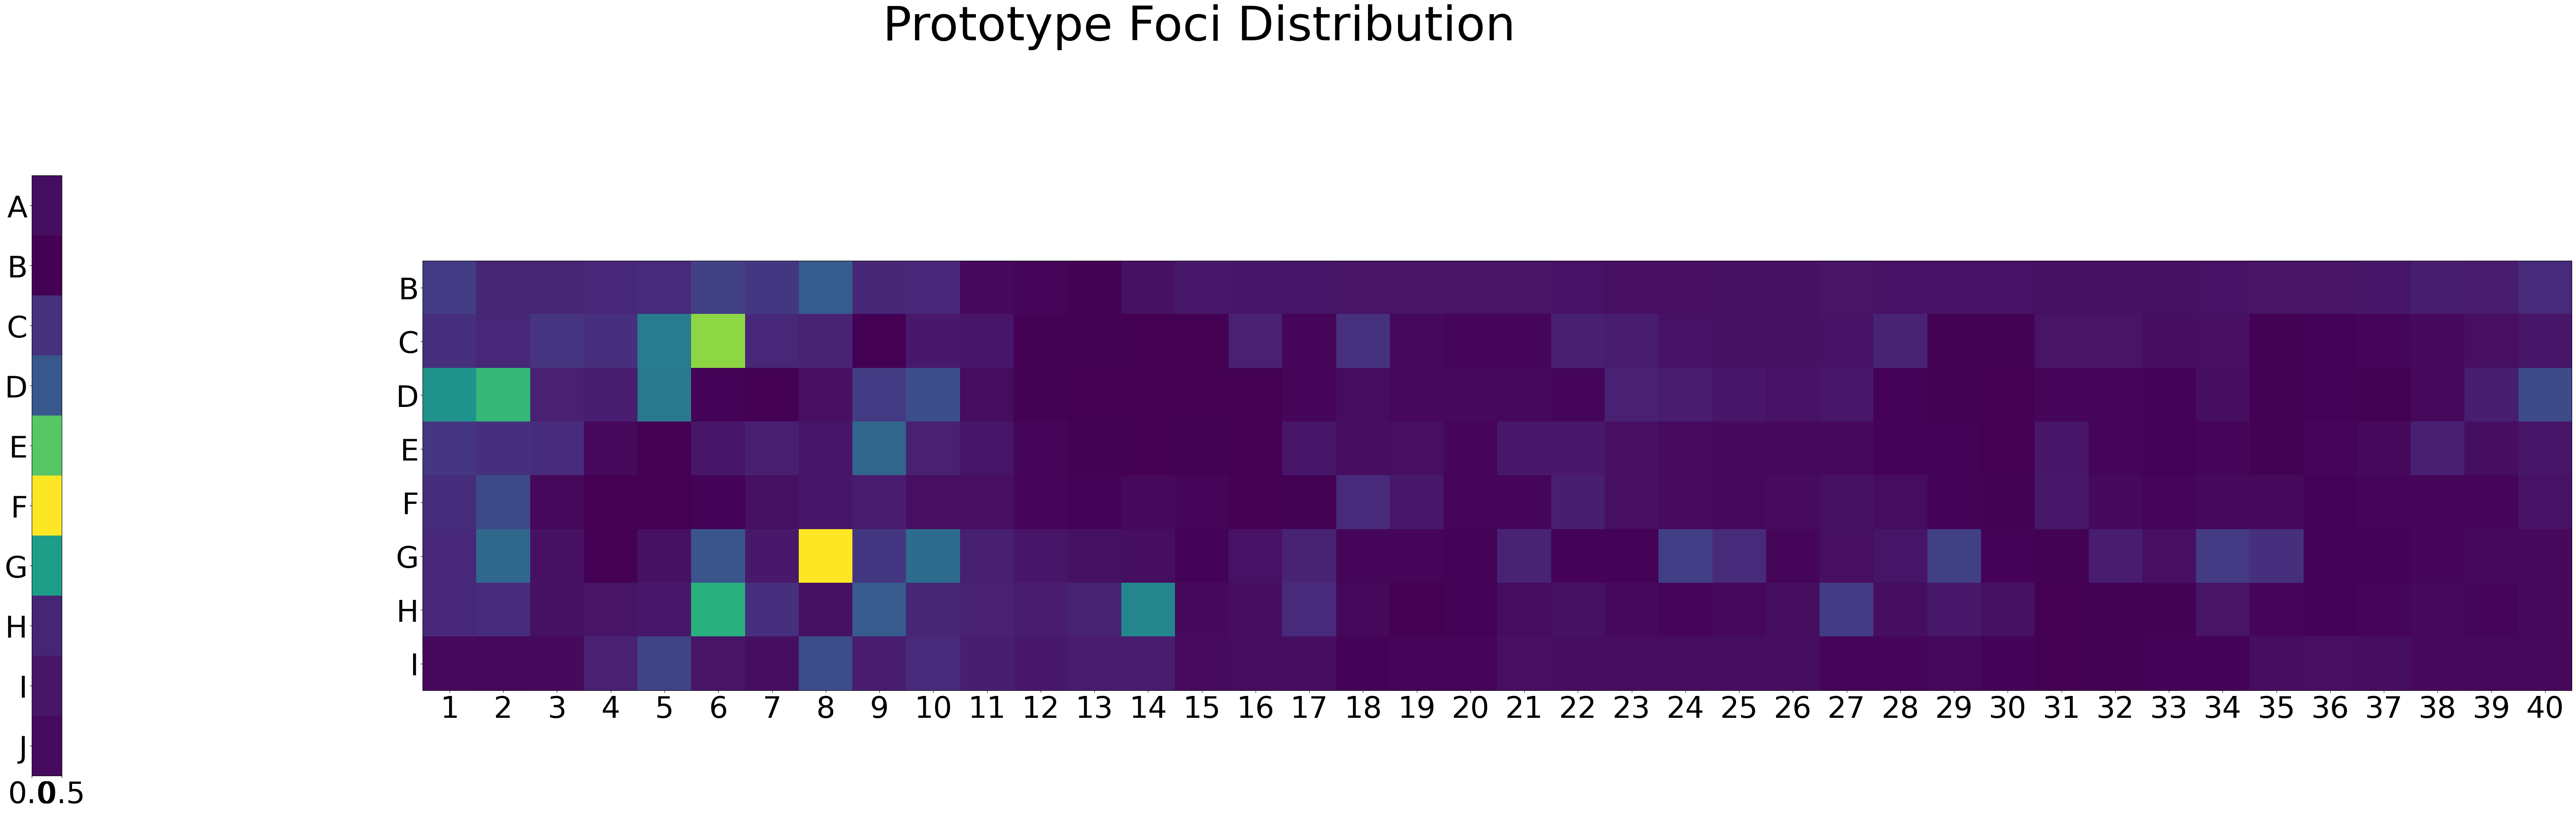

In [84]:
fig = plotValues(map_array_to(indexCoord, predicted), title='Prototype Foci Distribution')

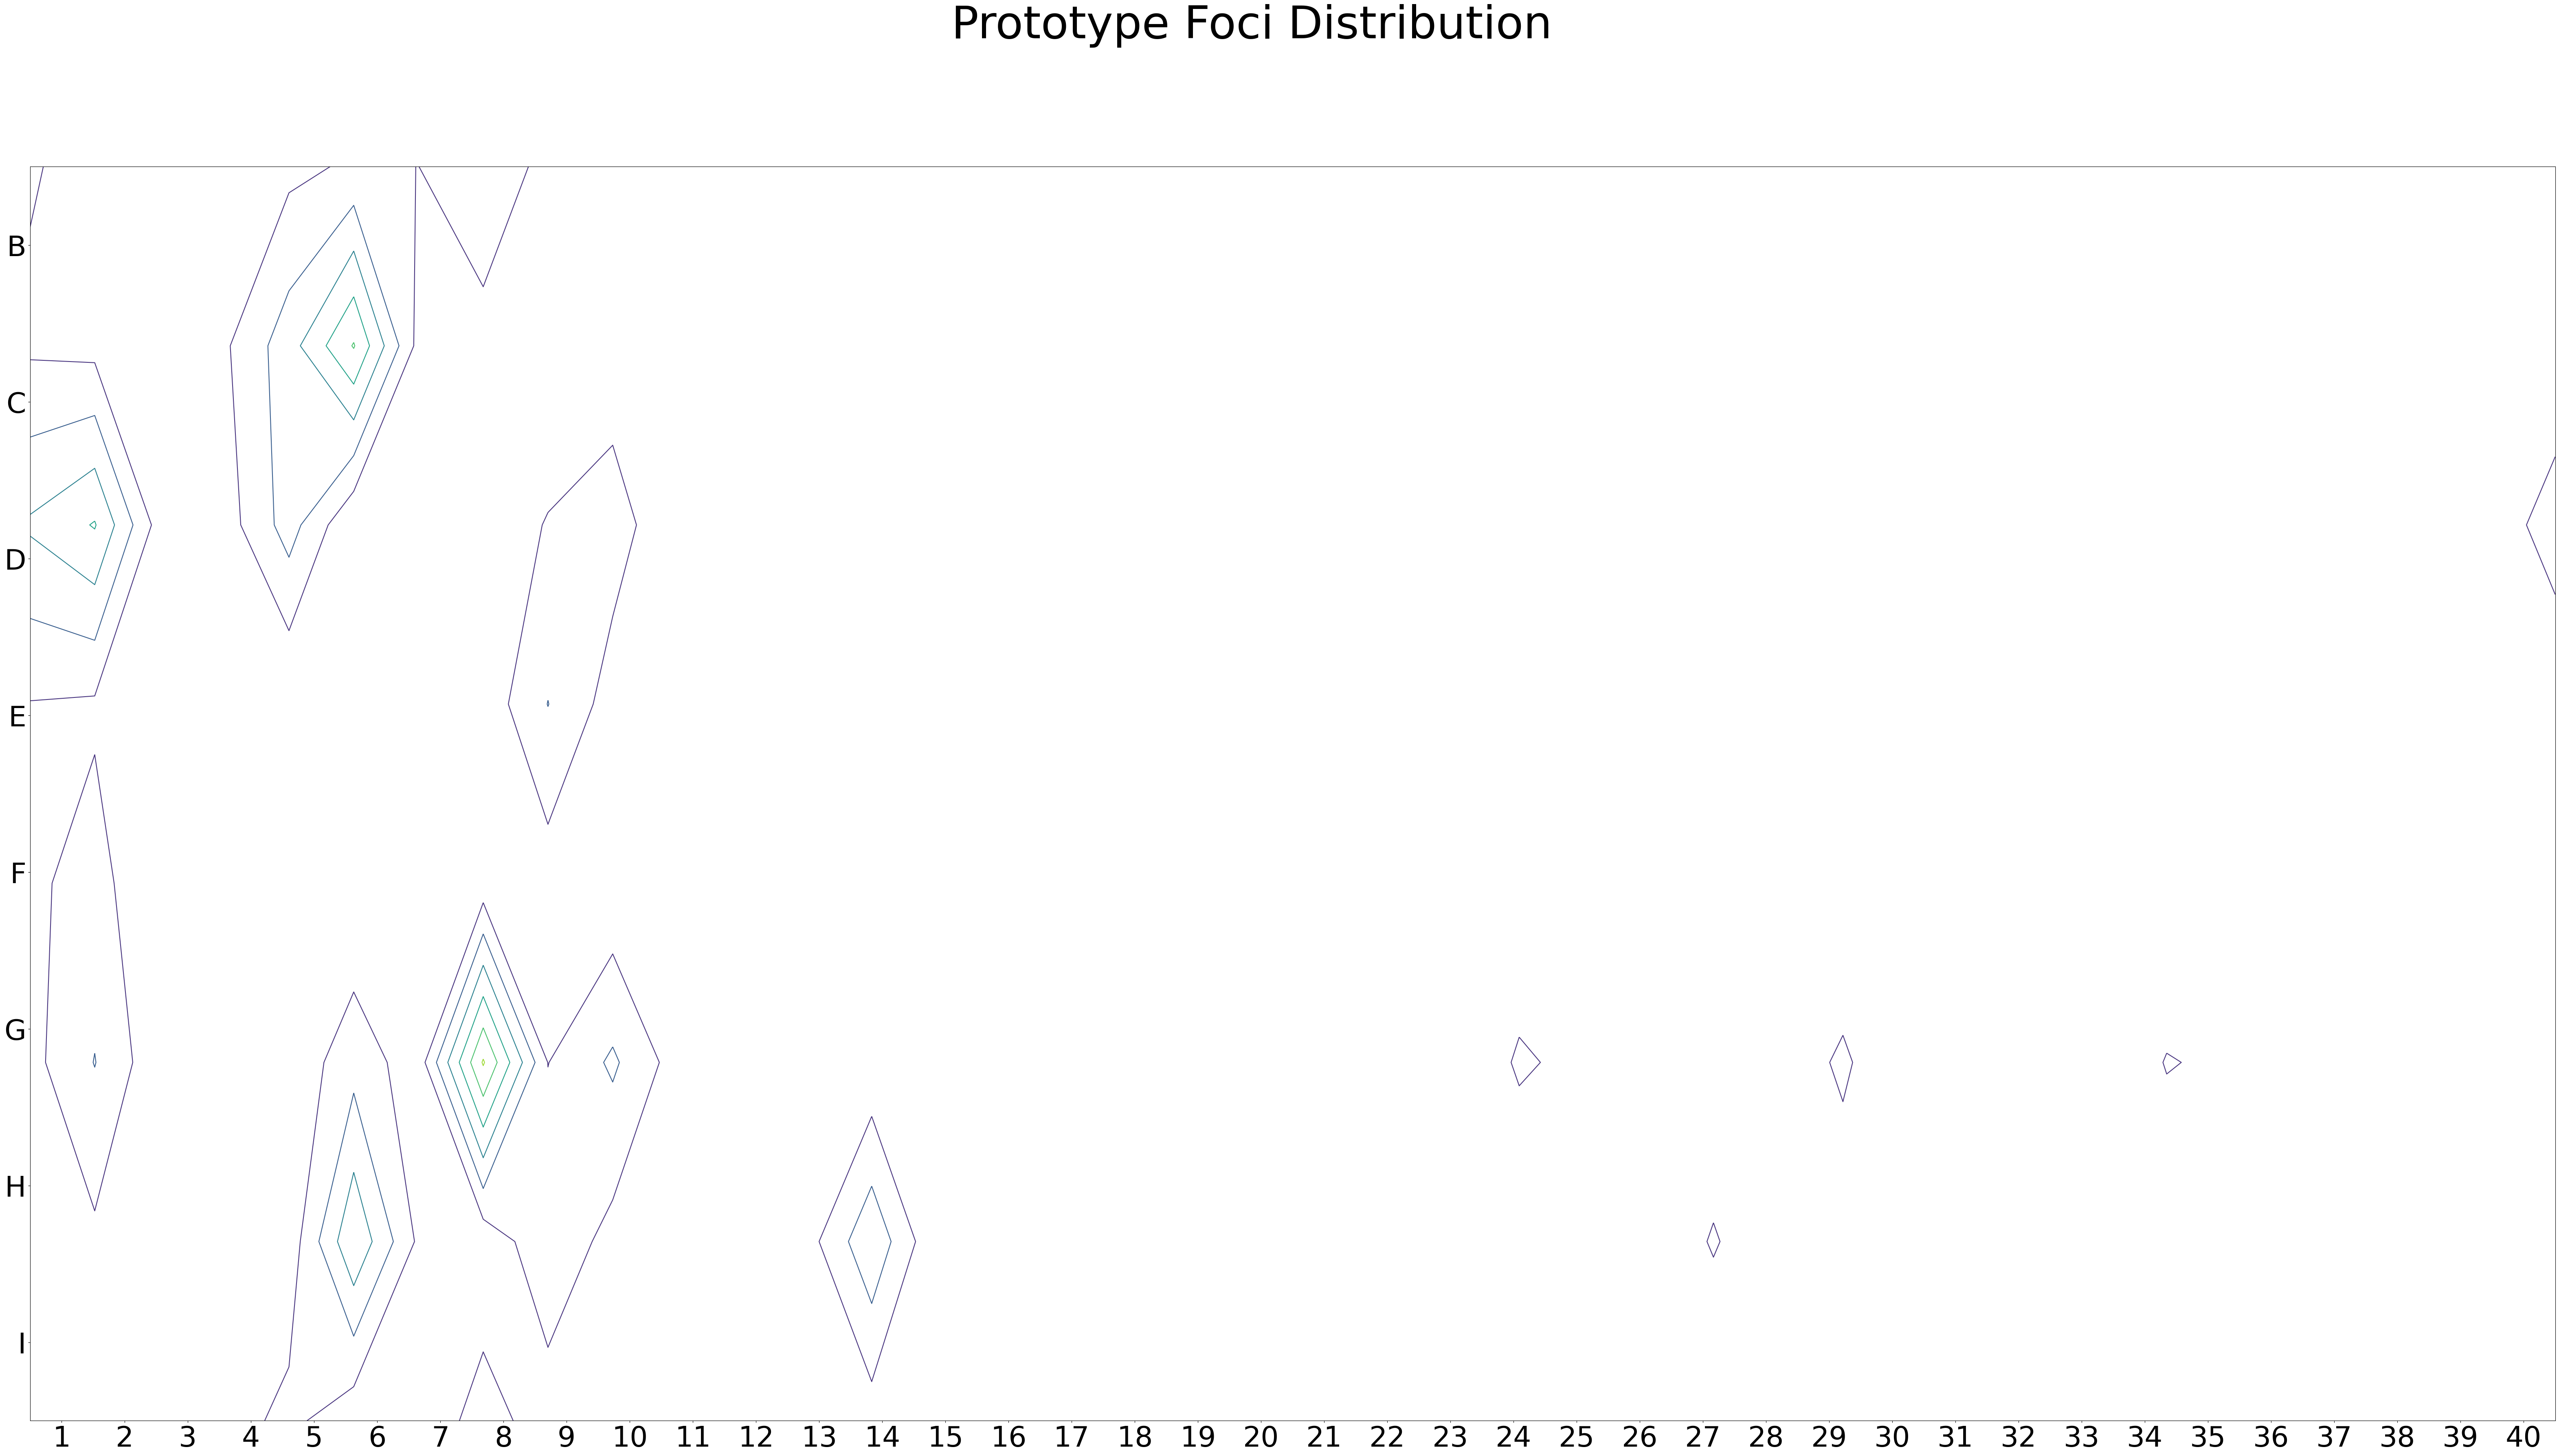

In [85]:
fig = plotValuesContour(map_array_to(indexCoord, predicted), title='Prototype Foci Distribution')